In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from sklearn.neighbors import KernelDensity
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import ARDRegression
import xgboost as xgb

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
deliv_df = pd.read_csv('/content/dataset_for_predictions.csv').drop(["Unnamed: 0"], axis = 1)

In [91]:
deliv_df = deliv_df.drop(["FORECAST_DATE"], axis = 1)

In [92]:
target = deliv_df["courier_num"]
features = deliv_df.drop(["courier_num"], axis = 1)

In [93]:
features["entr_sq"] = features["entropy"]*features["entropy"]
features["lognormed*ent"] = np.log(features["entropy"])*features["entropy"]

In [94]:
features

,num_of_orders,entropy,entr_sq,lognormed*ent
0,614,5.113470,26.147573,8.344560
1,146,4.174179,17.423768,5.964558
2,169,4.276599,18.289303,6.214575
3,391,5.017094,25.171236,8.091825
4,1127,5.464009,29.855395,9.278886
...,...,...,...,...
117,567,4.985495,24.855161,8.009361
118,612,5.233561,27.390161,8.662025
119,198,4.318521,18.649622,6.317620
120,193,4.373321,19.125939,6.452935


In [120]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=59)

In [121]:
clf = xgb.XGBRegressor()

In [122]:
clf.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [123]:
predictions = clf.predict(X_test)

In [124]:
clf.score(X_test, y_test)

0.8598985635041787

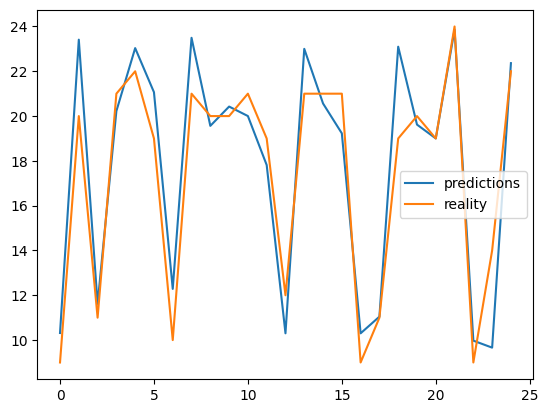

In [125]:
plt.plot(predictions, label = "predictions")
plt.plot(list(y_test), label = "reality")
plt.legend()